In [2]:
import ROOT
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [3]:
data_h_rest = pd.read_csv('OUTPUT_Z_Propagator_DATA_particle_momentum_data.csv')
data_Z_rest = pd.read_csv('OUTPUT_Zrest_ZProp.csv')

In [4]:
# Initialize a list to store the Z boson momentum vectors
z_boson_momenta = []
data = data_h_rest
# Loop through the data to extract Z boson momenta
for i in range(len(data_h_rest)):
    # Check if the current particle is a Z Boson
    if data.iloc[i, 1] == 'Z Boson':
        # Extract momentum components (Px, Py, Pz)
        px = data.iloc[i, 2]
        py = data.iloc[i, 3]
        pz = data.iloc[i, 4]
        
        # Calculate the momentum vector as a numpy array
        momentum_vector = np.array([px, py, pz])
        
        # Append the momentum vector to the list
        z_boson_momenta.append(momentum_vector)

# Convert the list of Z boson momenta to a DataFrame for easier handling
z_boson_momenta_df = pd.DataFrame(z_boson_momenta, columns=['Px', 'Py', 'Pz'])

# Print the momentum vectors for Z boson (event by event)
print("Z Boson Momentum Vectors (Event by Event):")
print(z_boson_momenta_df)

# Optionally, save the momentum vectors to a new CSV file
z_boson_momenta_df.to_csv('z(ZProp)_boson_momenta.csv', index=True)


Z Boson Momentum Vectors (Event by Event):
             Px         Py         Pz
0    -18.290857 -17.235518 -11.175652
1    -16.927574   9.896358 -19.769213
2     -6.212708  13.784579  25.852228
3      0.545921 -25.375134 -19.326395
4    -23.596687 -22.229040  15.945297
...         ...        ...        ...
9949  18.133320 -22.357569   9.209110
9950 -20.951756  -0.809722  22.718752
9951   8.813547   5.294589 -29.732714
9952  20.879829  28.052488   7.601995
9953   4.901194   7.630600  26.443684

[9954 rows x 3 columns]


In [5]:
# Load the CSV file
data = pd.read_csv('OUTPUT_Zrest_ZProp.csv')

# Initialize a list to store the momentum vectors of Electron+ and Electron- for each event
electron_momenta = []

# Loop through the data to extract momentum for Electron+ and Electron-
for i in range(len(data)):
    particle = data.iloc[i, 2]  # Get the particle column
    
    # Ensure particle is a string before using .strip()
    if isinstance(particle, str):  # Check if it's a string
        particle = particle.strip()  # Remove leading/trailing spaces
    
    # Check if the particle is Electron+ or Electron-
    if particle == 'Electron-':
        # Extract the momentum components (Px, Py, Pz)
        px = data.iloc[i, 3]
        py = data.iloc[i, 4]
        pz = data.iloc[i, 5]
        
        # Calculate the momentum vector as a numpy array
        momentum_vector = np.array([px, py, pz])
        
        # Store the event number, particle type, and the momentum vector
        event_number = data.iloc[i, 0]
        particle_type = data.iloc[i, 1]
        electron_momenta.append([event_number, *momentum_vector])

# Convert the list of electron momenta to a DataFrame for easier handling
electron_momenta_df = pd.DataFrame(electron_momenta, columns=['Event', 'Px', 'Py', 'Pz'])

# Print the momentum vectors for the electrons
print("Momentum Vectors for Electron- (Event by Event):")
print(electron_momenta_df)

# Optionally, save the electron momentum vectors to a new CSV file
electron_momenta_df.to_csv('electron(ZProp)_momenta_Zrest.csv', index=True)



Momentum Vectors for Electron- (Event by Event):
      Event         Px         Py         Pz
0         3 -13.643480  35.272068  27.512489
1         8   7.230058 -37.961525  25.935173
2        13 -29.872666  -9.176496 -32.524536
3        43  11.581730 -39.974547  -1.305078
4        58 -29.199587 -28.160851  16.443632
...     ...        ...        ...        ...
4952  49713 -29.076684  35.401632  -3.157069
4953  49718  -6.908405 -24.633421 -24.204623
4954  49733 -38.303125  10.173547  17.248388
4955  49738   1.273393 -23.475163  26.764592
4956  49768 -27.236582 -37.389887   4.380567

[4957 rows x 4 columns]


In [6]:
import pandas as pd
import numpy as np

# Load the CSV files for Z boson and electron data
z_data = pd.read_csv('z(ZProp)_boson_momenta.csv')  # Replace with the correct path to the Z boson CSV
electron_data = pd.read_csv('electron(ZProp)_momenta_Zrest.csv')  # Replace with the correct path to the electron CSV

# Initialize a list to store the angle between Z boson and electron momenta for each event
angles = []

# Loop through each row in Z boson data and find the corresponding electron data by event
for i in range(len(z_data)):
    # Extract the momentum of Z boson
    z_px, z_py, z_pz = z_data.iloc[i, 1], z_data.iloc[i, 2], z_data.iloc[i, 3]
    z_momentum = np.array([z_px, z_py, z_pz])
    
    # Check if the event exists in electron data (assuming same event IDs between Z and electron)
    event_id = z_data.iloc[i, 0]
    electron_row = electron_data[electron_data['Event'] == event_id]
    
    # If there is corresponding electron data for this event, compute the angle
    if not electron_row.empty:
        # Extract the momentum of electron
        electron_px, electron_py, electron_pz = electron_row.iloc[0, 2], electron_row.iloc[0, 3], electron_row.iloc[0, 4]
        electron_momentum = np.array([electron_px, electron_py, electron_pz])
        
        # Compute the dot product and magnitudes of the two momentum vectors
        dot_product = np.dot(z_momentum, electron_momentum)
        z_magnitude = np.linalg.norm(z_momentum)
        electron_magnitude = np.linalg.norm(electron_momentum)
        
        # Compute the angle (in radians)
        cos_theta = dot_product / (z_magnitude * electron_magnitude)
        theta = np.arccos(np.clip(cos_theta, -1.0, 1.0))  # Clip to avoid numerical errors
        
        # Store the angle in the list
        angles.append([event_id, theta])

# Convert the list of angles to a DataFrame
angles_df = pd.DataFrame(angles, columns=['Event', 'Angle (radians)'])

# Optionally, save the angles to a new CSV file
angles_df.to_csv('z(ZProp)_electron_angle.csv', index=True)

# Print the angles
print(angles_df)


     Event  Angle (radians)
0        3         2.862441
1        8         2.360303
2       13         0.636926
3       43         2.066259
4       58         1.864707
..     ...              ...
970   9928         0.658571
971   9933         1.147321
972   9938         1.235949
973   9943         2.168638
974   9948         2.874783

[975 rows x 2 columns]


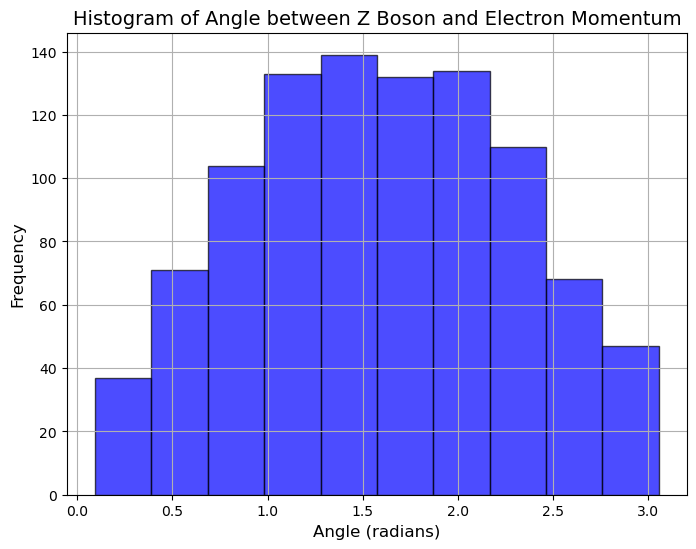

In [7]:
# Load the angles data (already computed from the previous step)
angles_df = pd.read_csv('z(ZProp)_electron_angle.csv')  # Replace with the correct path to the angle CSV

# Plotting the histogram of angles
plt.figure(figsize=(8, 6))
plt.hist(angles_df['Angle (radians)'], bins=10, alpha=0.7, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('Angle (radians)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram of Angle between Z Boson and Electron Momentum', fontsize=14)
plt.grid(True)

# Show the plot
plt.show()

In [8]:
# Load the CSV file
data = pd.read_csv('OUTPUT_Zrest_ZProp.csv')

# Initialize a list to store the momentum vectors of Electron+ and Electron- for each event
electron_momenta = []

# Loop through the data to extract momentum for Electron+ and Electron-
for i in range(len(data)):
    particle = data.iloc[i, 2]  # Get the particle column
    
    # Ensure particle is a string before using .strip()
    if isinstance(particle, str):  # Check if it's a string
        particle = particle.strip()  # Remove leading/trailing spaces
    
    # Check if the particle is Electron+ or Electron-
    if particle == 'Electron+':
        # Extract the momentum components (Px, Py, Pz)
        px = data.iloc[i, 3]
        py = data.iloc[i, 4]
        pz = data.iloc[i, 5]
        
        # Calculate the momentum vector as a numpy array
        momentum_vector = np.array([px, py, pz])
        
        # Store the event number, particle type, and the momentum vector
        event_number = data.iloc[i, 0]
        particle_type = data.iloc[i, 1]
        electron_momenta.append([event_number, *momentum_vector])

# Convert the list of electron momenta to a DataFrame for easier handling
electron_momenta_df = pd.DataFrame(electron_momenta, columns=['Event', 'Px', 'Py', 'Pz'])

# Print the momentum vectors for the electrons
print("Momentum Vectors for Electron+ (Event by Event):")
print(electron_momenta_df)

# Optionally, save the electron momentum vectors to a new CSV file
electron_momenta_df.to_csv('positron(ZProp)_momenta_Zrest.csv', index=True)



Momentum Vectors for Electron+ (Event by Event):
      Event         Px         Py         Pz
0         2  13.643479 -35.272069 -27.512491
1         7  -7.230057  37.961522 -25.935175
2        12  29.872666   9.176495  32.524535
3        42 -11.581730  39.974548   1.305077
4        57  29.199587  28.160851 -16.443633
...     ...        ...        ...        ...
4952  49712  29.076685 -35.401632   3.157069
4953  49717   6.908404  24.633424  24.204623
4954  49732  38.303125 -10.173548 -17.248389
4955  49737  -1.273393  23.475162 -26.764591
4956  49767  27.236582  37.389887  -4.380567

[4957 rows x 4 columns]


In [9]:
import pandas as pd
import numpy as np

# Load the CSV files for Z boson and electron data
z_data = pd.read_csv('z(ZProp)_boson_momenta.csv')  # Replace with the correct path to the Z boson CSV
electron_data = pd.read_csv('positron(ZProp)_momenta_Zrest.csv')  # Replace with the correct path to the electron CSV

# Initialize a list to store the angle between Z boson and electron momenta for each event
angles = []

# Loop through each row in Z boson data and find the corresponding electron data by event
for i in range(len(z_data)):
    # Extract the momentum of Z boson
    z_px, z_py, z_pz = z_data.iloc[i, 1], z_data.iloc[i, 2], z_data.iloc[i, 3]
    z_momentum = np.array([z_px, z_py, z_pz])
    
    # Check if the event exists in electron data (assuming same event IDs between Z and electron)
    event_id = z_data.iloc[i, 0]
    electron_row = electron_data[electron_data['Event'] == event_id]
    
    # If there is corresponding electron data for this event, compute the angle
    if not electron_row.empty:
        # Extract the momentum of electron
        electron_px, electron_py, electron_pz = electron_row.iloc[0, 2], electron_row.iloc[0, 3], electron_row.iloc[0, 4]
        electron_momentum = np.array([electron_px, electron_py, electron_pz])
        
        # Compute the dot product and magnitudes of the two momentum vectors
        dot_product = np.dot(z_momentum, electron_momentum)
        z_magnitude = np.linalg.norm(z_momentum)
        electron_magnitude = np.linalg.norm(electron_momentum)
        
        # Compute the angle (in radians)
        cos_theta = dot_product / (z_magnitude * electron_magnitude)
        theta = np.arccos(np.clip(cos_theta, -1.0, 1.0))  # Clip to avoid numerical errors
        
        # Store the angle in the list
        angles.append([event_id, theta])

# Convert the list of angles to a DataFrame
angles_df = pd.DataFrame(angles, columns=['Event', 'Angle (radians)'])

# Optionally, save the angles to a new CSV file
angles_df.to_csv('z(ZProp)_positron_angle.csv', index=True)

# Print the angles
print(angles_df)


     Event  Angle (radians)
0        2         2.727441
1        7         1.521404
2       12         1.464643
3       42         0.627551
4       57         0.786278
..     ...              ...
970   9927         2.550969
971   9932         0.624643
972   9937         0.597600
973   9942         2.188817
974   9947         2.337536

[975 rows x 2 columns]


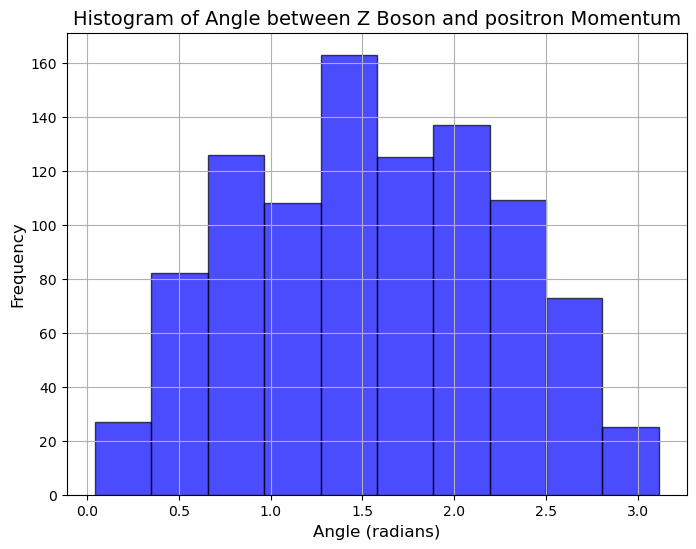

In [11]:
# Load the angles data (already computed from the previous step)
angles_df = pd.read_csv('z(ZProp)_positron_angle.csv')  # Replace with the correct path to the angle CSV

# Plotting the histogram of angles
plt.figure(figsize=(8, 6))
plt.hist(angles_df['Angle (radians)'], bins=10, alpha=0.7, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('Angle (radians)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram of Angle between Z Boson and positron Momentum', fontsize=14)
plt.grid(True)

# Show the plot
plt.show()